<a href="https://colab.research.google.com/github/shirkepranav98/Play-Store-App-Review-Analysis-/blob/main/Pranav_Shirke_Play_Store_App_Review_Analysis_EDA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

## Which free app is having highest installs and most number of reviews with rating greater than 4?

# Mounting the Drive and Loading the csv files





In [3]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Import pandas 
import pandas as pd
import numpy as np
import seaborn as sns

In [7]:
# Loading two csv files as path1 and path2
path1 = '/content/drive/MyDrive/AlmaBetter/Project on play store/csv files/'
path2 = '/content/drive/MyDrive/AlmaBetter/Project on play store/csv files/'

In [18]:
play_df = pd.read_csv(path1 + 'Play Store Data.csv')
user_df = pd.read_csv(path2 + 'User Reviews.csv')

# 1. INTRODUCTION TO DATA
---
Firstly let's get to know data. While I was analyzing the data, I used Pandas library.

1. info(): It informs about data columns and data types.
2. head(): It returns the first five data.
3. tail(): It returns the last five data.
4. columns : It returns data columns
5. describe : To get some basic statistical details
5. shape : It gives number of rows and columns in a tuble.

In [19]:
play_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [20]:
play_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [21]:
play_df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [22]:
play_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [23]:
play_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [24]:
play_df.shape

(10841, 13)

# Cleaning of Data
---



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe953246510>]],
      dtype=object)

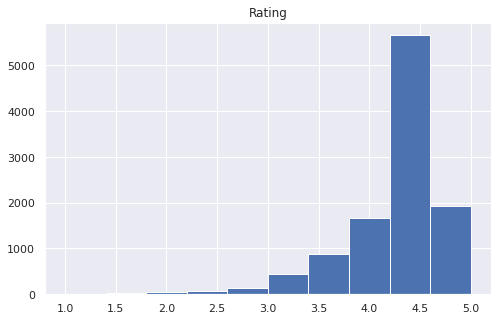

In [54]:
play_df.hist(column='Rating')

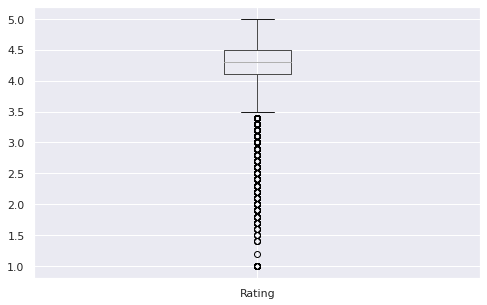

In [55]:
play_df.boxplot(column='Rating');

In [27]:
# Changing the column names to one word
play_df.rename(columns={'Last Updated':'Last_Updated', 'Content Rating':'Content_Rating', 'Current Ver':'Current_Version', 'Android Ver':'Android_Version'}, inplace = True)

In [28]:
# Finding the sum of null values for each dataseries throughout the Dataframe
play_df.isnull().sum()

App                   0
Category              0
Rating             1474
Reviews               0
Size                  0
Installs              0
Type                  1
Price                 0
Content_Rating        1
Genres                0
Last_Updated          0
Current_Version       8
Android_Version       3
dtype: int64

In [ ]:
# Checking the most ocurred value in Rating in sorted manner
play_df['Rating'].value_counts()

In [30]:
# Checking the outliers 
play_df[play_df.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Version,Android_Version
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [32]:
# Removing the outliers from column as its increases our variability in our data.
play_df.drop([10472],inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


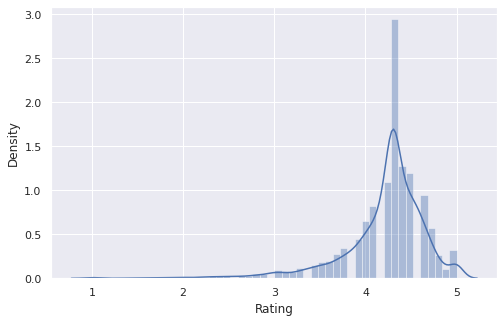

In [51]:
sns.set(rc={'figure.figsize':(8,5)})
sns.distplot(play_df.Rating)

In [ ]:
# Checking the dropped outliers with method of slicing
play_df[10471:10475]

In [34]:
''' Filling null values with median value because as we can see from the graph appeared as skewed to left.
 So the median is usually preferred to other measures of central tendency when your data set is skewed '''

play_df['Rating'] = play_df['Rating'].replace(np.nan, play_df['Rating'].median())

In [35]:
# Counting the number of null values in Rating column
play_df.Rating.isnull().sum()

0

In [36]:
# Converting datetime format for Last_Updated column
# Importing datetime modules
from datetime import datetime
from datetime import date

In [37]:
play_df['Last_Updated'] = pd.to_datetime(play_df['Last_Updated'],errors='coerce')

In [38]:
play_df['Last_Updated'][:2]

0   2018-01-07
1   2018-01-15
Name: Last_Updated, dtype: datetime64[ns]

In [39]:
# Converting the datatype of Reviews into numeric datatype
play_df['Reviews'] = pd.to_numeric(play_df['Reviews'])

In [40]:
play_df.Reviews.dtype

dtype('int64')

In [41]:
play_df.shape

(10840, 13)

In [42]:
# Checking the null values in Type Column
play_df['Type'].isnull().sum()

1

In [43]:
# Display the row which have null values in Type Column
play_df.loc[play_df.Type.isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Version,Android_Version
9148,Command & Conquer: Rivals,FAMILY,4.3,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,2018-06-28,Varies with device,Varies with device


In [44]:
# Drop the row from because it has undisturbed data all over the row
play_df.drop([9148],inplace=True)

In [45]:
# Checking the dropped row with slicing
play_df[9145:9150]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Version,Android_Version
9145,EA SPORTS™ FIFA 18 Companion,SPORTS,3.9,282727,63M,"10,000,000+",Free,0,Everyone,Sports,2017-12-07,18.0.5.172734,4.4 and up
9146,The Simpsons™: Tapped Out,FAMILY,4.3,636995,49M,"10,000,000+",Free,0,Teen,Casual,2018-07-31,4.34.0,4.0.3 and up
9147,Plants vs. Zombies™ 2,FAMILY,4.4,567632,15M,"10,000,000+",Free,0,Everyone 10+,Casual,2018-06-12,6.8.1,4.1 and up
9149,Star Wars™: Galaxy of Heroes,FAMILY,4.5,1461698,67M,"10,000,000+",Free,0,Everyone 10+,Role Playing,2018-05-21,0.12.334385,4.1 and up
9150,Dungeon Keeper,FAMILY,4.0,69574,45M,"500,000+",Free,0,Everyone 10+,Strategy,2018-05-24,1.8.91,4.1 and up


In [46]:
play_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10839 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   App              10839 non-null  object        
 1   Category         10839 non-null  object        
 2   Rating           10839 non-null  float64       
 3   Reviews          10839 non-null  int64         
 4   Size             10839 non-null  object        
 5   Installs         10839 non-null  object        
 6   Type             10839 non-null  object        
 7   Price            10839 non-null  object        
 8   Content_Rating   10839 non-null  object        
 9   Genres           10839 non-null  object        
 10  Last_Updated     10839 non-null  datetime64[ns]
 11  Current_Version  10831 non-null  object        
 12  Android_Version  10837 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(10)
memory usage: 1.2+ MB


In [47]:
play_df.isnull().sum()

App                0
Category           0
Rating             0
Reviews            0
Size               0
Installs           0
Type               0
Price              0
Content_Rating     0
Genres             0
Last_Updated       0
Current_Version    8
Android_Version    2
dtype: int64